In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #Outputs data to onehotencoded form
import random

np.random.seed(0)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#To check if dataset has been imported correctly
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

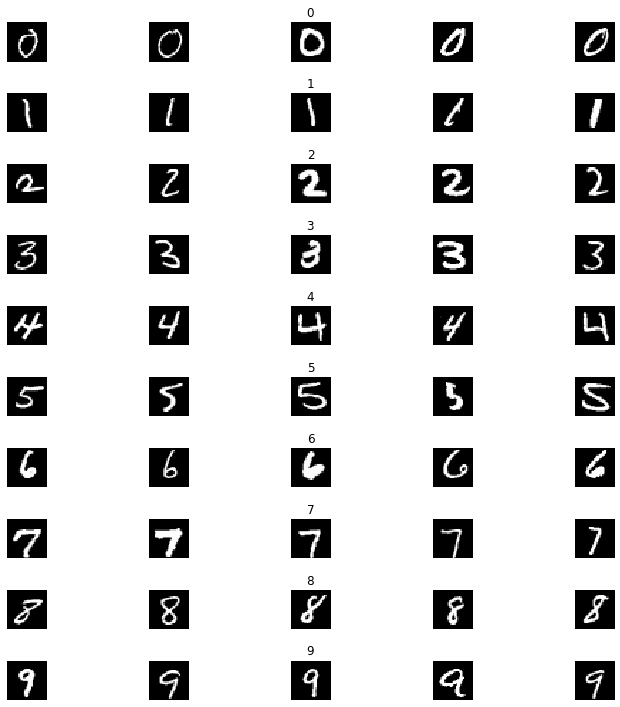

In [5]:
#Plotting and analyzing data
num_of_samples = [] #To record the amount of images in each of 10 categories
#Creating grid of images
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (10,10))
fig.tight_layout() #Minimizes overlapping and does a tight fitting
for i in range(cols):#For each row, iterating every column
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)),:,:],
        cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2: #Setting title on the middle column
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

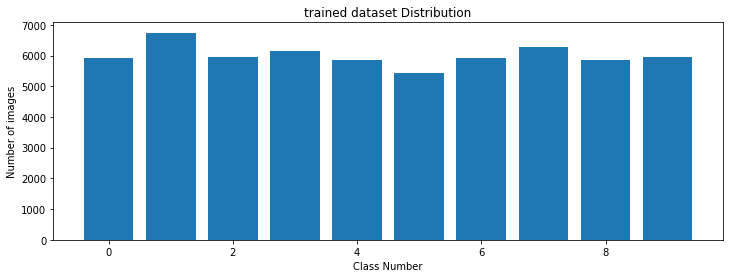

In [6]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('trained dataset Distribution')
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [7]:
# One hot encoding the label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
#Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [9]:
#Converting image to one dimensional
num_pixels = 784 #28 X 28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax')) #Softmax converts o/p to probability
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model  = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, 
          batch_size = 200, verbose = 1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 96us/step - loss: 0.5437 - accuracy: 0.8295 - val_loss: 0.2696 - val_accuracy: 0.9228
Epoch 2/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.2992 - accuracy: 0.9116 - val_loss: 0.2317 - val_accuracy: 0.9327
Epoch 3/10
54000/54000 [==============================] - 9s 170us/step - loss: 0.2682 - accuracy: 0.9203 - val_loss: 0.2092 - val_accuracy: 0.9397oss:
Epoch 4/10
54000/54000 [==============================] - 7s 131us/step - loss: 0.2492 - accuracy: 0.9258 - val_loss: 0.2140 - val_accuracy: 0.9347
Epoch 5/10
54000/54000 [==============================] - 6s 102us/step - loss: 0.2363 - accuracy: 0.9296 - val_loss: 0.2115 - val_accuracy: 0.9370
Epoch 6/10
54000/54000 [==============================] - 5s 92us/step - loss: 0.2304 - accuracy: 0.9323 - val_loss: 0.2022 - val_accuracy: 0.9413
Epoch 7/10
54000/54000 [==============================] - 5s 

'If validation error becomes higher than the training error, \nmeans the model is doing poor on the validation set'

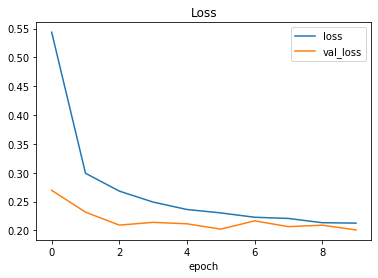

In [15]:
#plotting the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

"""If validation error becomes higher than the training error, 
means the model is doing poor on the validation set"""

Text(0.5, 0, 'epochs')

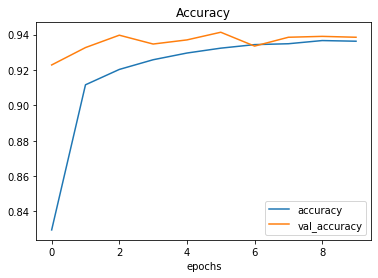

In [19]:
#Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')

### CREATING A COMPLEX MODEL TO COMPARE

In [20]:
def create_complex_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu'))
    model.add(Dense(num_pixels, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax')) #Softmax converts o/p to probability
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model_new  = create_complex_model()
print(model_new.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history_new = model_new.fit(X_train, y_train, validation_split = 0.1, epochs = 10, 
          batch_size = 200, verbose = 1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 29s 538us/step - loss: 0.3567 - accuracy: 0.9138 - val_loss: 0.1369 - val_accuracy: 0.9622
Epoch 2/10
54000/54000 [==============================] - 37s 690us/step - loss: 0.1246 - accuracy: 0.9627 - val_loss: 0.1112 - val_accuracy: 0.9682
Epoch 3/10
54000/54000 [==============================] - 39s 731us/step - loss: 0.0997 - accuracy: 0.9705 - val_loss: 0.1164 - val_accuracy: 0.9647
Epoch 4/10
54000/54000 [==============================] - 37s 685us/step - loss: 0.0897 - accuracy: 0.9733 - val_loss: 0.1225 - val_accuracy: 0.9690
Epoch 5/10
54000/54000 [==============================] - 41s 758us/step - loss: 0.0874 - accuracy: 0.9749 - val_loss: 0.1067 - val_accuracy: 0.9722
Epoch 6/10
54000/54000 [==============================] - 43s 795us/step - loss: 0.0765 - accuracy: 0.9776 - val_loss: 0.1329 - val_accuracy: 0.9670
Epoch 7/10
54000/54000 [==============================] -

### PLOTTING THE ACCURACIES AND LOSSES TO CHECK FOR OVERFITTING

Text(0.5, 0, 'epoch')

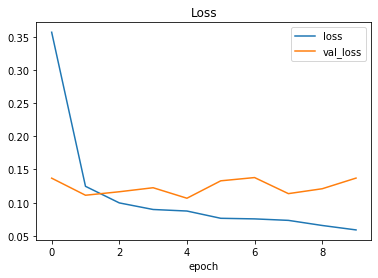

In [24]:
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epochs')

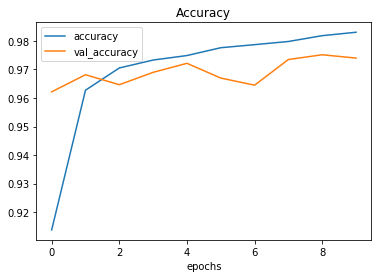

In [25]:
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')

### The model is clearly overfitting the data

In [26]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test Score: ', score[0])
print('Test accouracy: ', score[1])

<class 'list'>
Test Score:  0.24361963874697684
Test accouracy:  0.930899977684021


In [28]:
#GETTING IMAGE FROM INTERNET AND PREDICTING
import requests
link = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(link, stream = True)
print(response) #Successful get request

<Response [200]>


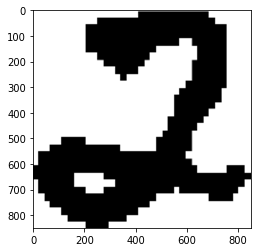

In [30]:
#Using python image library
from PIL import Image
img = Image.open(response.raw)
plt.imshow(img)

In [31]:
img_array = np.asarray(img)
print(img_array.shape)

(850, 850, 4)


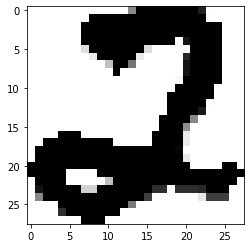

In [34]:
#Preprocessing the data using openCV tools
import cv2
resized = cv2.resize(img_array, (28, 28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_scale, cmap = plt.get_cmap("gray"))

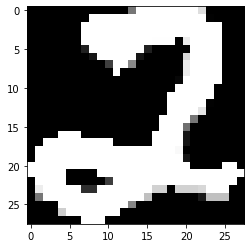

In [36]:
#Changing the background to black and foreground to white
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))

In [37]:
#Normalizing and flattening
image = image/255
image = image.reshape(1, 784)

In [38]:
prediction = model.predict_classes(image)
print('Predicted digit', str(prediction))

Predicted digit [3]
